In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('physchem.mplstyle')

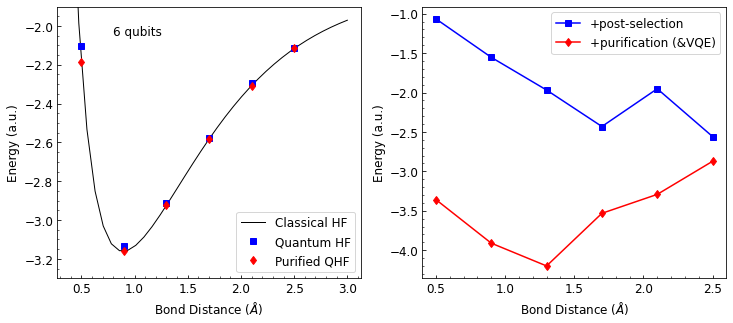

In [57]:
fig, axs = plt.subplots(1,2,figsize=(12,5))

lengths = np.linspace(0.4,3,35)
potent_curve = np.loadtxt('H6_potent_curve')

lengths2 = np.linspace(0.5,2.5,6)
data = []

for i in range(6):
    cl,qm,pqm = np.loadtxt('H6_e-%.2f'%lengths2[i])
    data.append([cl,qm,pqm])
    
data = np.asarray(data).T

axs[0].plot(lengths,potent_curve,'k',linewidth=1,label='Classical HF')
axs[0].plot(lengths2,data[1,:],'bs',label='Quantum HF')
axs[0].plot(lengths2,data[2,:],'rd',label='Purified QHF')

axs[0].legend()
axs[0].set_ylim(-3.3,-1.9)

axs[0].set_xlabel('Bond Distance ($\AA$)')
axs[0].set_ylabel('Energy (a.u.)')

axs[0].text(0.8,-2.05,'6 qubits')

axs[1].plot(lengths2,np.log10(data[1,:]-data[0,:]),'bs-',label='+post-selection')
axs[1].plot(lengths2,np.log10(data[2,:]-data[0,:]),'rd-',label='+purification (&VQE)')

axs[1].set_xlabel('Bond Distance ($\AA$)')
axs[1].set_ylabel('Energy (a.u.)')
axs[1].legend()

plt.savefig('QHF_VQE.png')
plt.show()


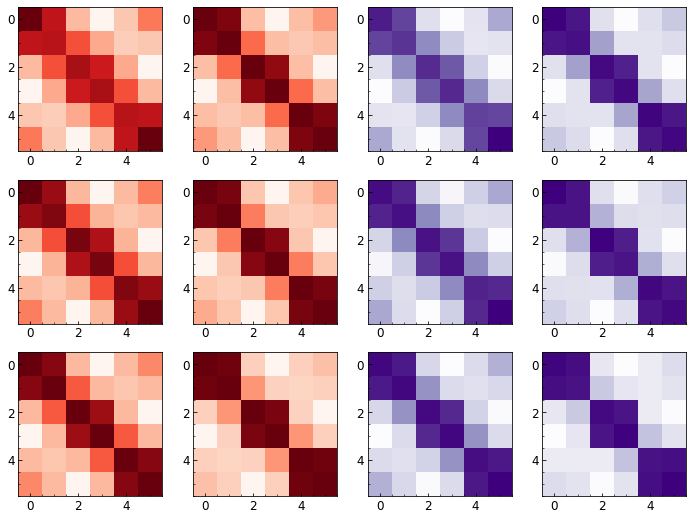

In [45]:
fig, axs = plt.subplots(3,4,figsize=(12,9))

for i in range(6):
    n,m = divmod(i,3)
    
    axs[m,n].imshow(np.loadtxt('H6_dm_cl-%.2f'%lengths2[i]),cmap='Reds')
    
for i in range(6,12):
    n,m = divmod(i,3)
    
    axs[m,n].imshow(np.loadtxt('H6_dm_qm-%.2f'%lengths2[i-6]),cmap='Purples')